In [2]:
import h5py    
import numpy as np
import matplotlib.pyplot as plt 

train_data = h5py.File("fracture_train_data.h5", 'r')

print(train_data)
print(train_data.keys())


<HDF5 file "fracture_train_data.h5" (mode r)>
<KeysViewHDF5 ['data_index', 'density_train0', 'train_images0', 'train_images1', 'train_labels0']>


In [4]:
dataindex = np.array(train_data["data_index"])

density = np.array(train_data["density_train0"])

images0 = np.array(train_data["train_images0"])

images1 = np.array(train_data["train_images1"])

labels0 = np.array(train_data["train_labels0"])

In [5]:
im0 = np.reshape(images0, (11136,125,300,1))

im1 = np.reshape(images1, (11136,125,300,1))

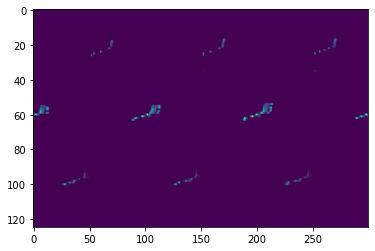

In [6]:
plt.imshow(im0[2780], aspect='auto')

In [7]:
print(labels0[0])
print(type(labels0))

0.19856459330143542
<class 'numpy.ndarray'>


In [8]:
import sklearn
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import math
import scipy


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(im0, labels0, test_size = 0.20, random_state = 33) # shuffle m into learning and validation set.

y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [9]:
print(y_train.shape)
print(x_train.shape)

(1, 8908)
(8908, 125, 300, 1)


In [10]:
#Reshape Data

y_train = y_train.T
y_test = y_test.T

print(y_train.shape)


(8908, 1)


In [11]:
print(y_train.T.shape)
print(x_train.shape)

(1, 8908)
(8908, 125, 300, 1)


In [29]:
unique_labels = np.unique(y_train)
print(unique_labels)
new_y = []

for i in y_train:
	new_y.append(np.flatnonzero(i == unique_labels)[0])
print(y_train[0:10],new_y[0:10])
new_y = np.array(new_y)

[0.00382775 0.0076555  0.01148325 0.015311   0.01913876 0.02511962
 0.03110048 0.03708134 0.0430622  0.04904306 0.05502392 0.06100478
 0.06698565 0.07296651 0.07894737 0.08492823 0.09090909 0.09688995
 0.10287081 0.10885167 0.11483254 0.12679426 0.13875598 0.1507177
 0.16267943 0.17464115 0.18660287 0.19856459]
[[0.10885167]
 [0.19856459]
 [0.07296651]
 [0.07894737]
 [0.05502392]
 [0.0076555 ]
 [0.10885167]
 [0.10287081]
 [0.09090909]
 [0.01913876]] [19, 27, 13, 14, 10, 1, 19, 18, 16, 4]


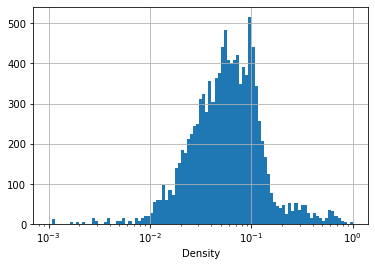

In [18]:
x = np.linspace(-3,0,100)

plt.hist(density, bins=10**x)
plt.xlabel('Density')
plt.xscale("log")
plt.grid("True")

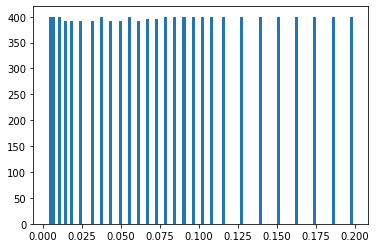

In [19]:
plt.hist(labels0, bins=100);

In [20]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import BatchNormalization

In [21]:
len(set(labels0))
#print(np.unique(labels0))
from keras.utils import to_categorical

y_binary = to_categorical(y_train, num_classes = 28)

print(y_train)

print(y_binary)

[[0.10885167]
 [0.19856459]
 [0.07296651]
 ...
 [0.17464115]
 [0.015311  ]
 [0.06100478]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


Using TensorFlow backend.


In [22]:
125*300

37500

In [23]:
np.random.seed(1942)
model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', input_shape = (125,300,1),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation= 'relu'))
model.add(Dense(28, activation= 'softmax'))

model.summary()

2022-02-26 10:50:56.345471: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-26 10:50:56.348195: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 300, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 125, 300, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 150, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 150, 32)       9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 150, 32)       128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 75, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 74400)             0

In [39]:
opt = keras.optimizers.Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history=model.fit(x_train, new_y, batch_size=20, epochs=5, validation_split=.1)

Train on 8017 samples, validate on 891 samples
Epoch 1/5
7120/8017 [=========================>....] - ETA: 26s - loss: 3.3363 - accuracy: 0.0394

KeyboardInterrupt: 

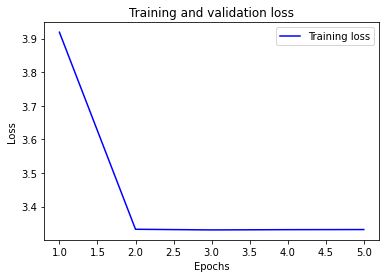

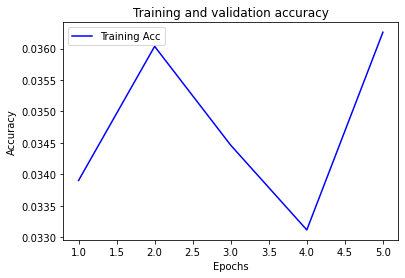

In [34]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
Y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(Y_pred[1:],y_test[1:])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0.05502392]
 [0.07296651]
 [0.09090909]
 ...
 [0.1507177 ]
 [0.03110048]
 [0.06100478]]
